### Problem Statement: Create a Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience.

## Data_Dictionary

=========================================================================

RATINGS FILE DESCRIPTION

=========================================================================

All ratings are contained in the file "ratings.dat" and are in the following format:

UserID::MovieID::Rating::Timestamp

UserIDs range between 1 and 6040

MovieIDs range between 1 and 3952

Ratings are made on a 5-star scale (whole-star ratings only)

Timestamp is represented in seconds

Each user has at least 20 ratings

=========================================================================

USERS FILE DESCRIPTION

=========================================================================

User information is in the file "users.dat" and is in the following format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is not checked for accuracy.
Only users who have provided some demographic information are included in this data set.

Gender is denoted by a "M" for male and "F" for female

Age is chosen from the following ranges:

1: "Under 18"

18: "18-24"

25: "25-34"

35: "35-44"

45: "45-49"

50: "50-55"

56: "56+"


Occupation is chosen from the following choices:

0: "other" or not specified

1: "academic/educator"

2: "artist"

3: "clerical/admin"

4: "college/grad student"

5: "customer service"

6: "doctor/health care"

7: "executive/managerial"

8: "farmer"

9: "homemaker"

10: "K-12 student"

11: "lawyer"

12: "programmer"

13: "retired"

14: "sales/marketing"

15: "scientist"

16: "self-employed"

17: "technician/engineer"

18: "tradesman/craftsman"

19: "unemployed"

20: "writer"


=========================================================================

MOVIES FILE DESCRIPTION

=========================================================================

Movie information is in the file "movies.dat" and is in the following format:

MovieID::Title::Genres

Titles are identical to titles provided by the IMDB (including year of release)

Genres are pipe-separated and are selected from the following genres:

- Action
- Adventure
- Animation
- Children's
- Comedy
- Crime
- Documentary
- Drama
- Fantasy
- Film-Noir
- Horror
- Musical
- Mystery
- Romance
- Sci-Fi
- Thriller
- War
- Western

## Importing_Libraries

In [2]:
#import all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [3]:
df_movies = pd.read_table('zee-movies.dat', sep='::')
df_ratings = pd.read_table('zee-ratings.dat', sep='::')
df_users = pd.read_table('zee-users.dat', sep='::')

In [4]:
df_movies.head()

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
df_ratings[df_ratings['UserID'] == 1]['MovieID'].nunique()

53

In [8]:
df_ratings[df_ratings['UserID'] == 1].count()

UserID       53
MovieID      53
Rating       53
Timestamp    53
dtype: int64

In [9]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie ID  3883 non-null   int64 
 1   Title     3883 non-null   object
 2   Genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [10]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [11]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


##### Good. There are no null values in our dataset

In [12]:
#Let us first explore the movies dataset, them followed by ratings and users


df_movies.head()

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
df_movies[df_movies['Movie ID'] == 1]

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy


In [14]:
df_movies['Genres'] = df_movies['Genres'].apply(lambda x : x.split('|'))

In [15]:
df_movies = df_movies.explode('Genres')

In [16]:
df_movies[df_movies['Movie ID'] == 1]

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy


In [17]:
df_movies['Title'].reset_index()

,index,Title
0,0,Toy Story (1995)
1,0,Toy Story (1995)
2,0,Toy Story (1995)
3,1,Jumanji (1995)
4,1,Jumanji (1995)
...,...,...
6403,3879,Requiem for a Dream (2000)
6404,3880,Tigerland (2000)
6405,3881,Two Family House (2000)
6406,3882,"Contender, The (2000)"


## movies_eda

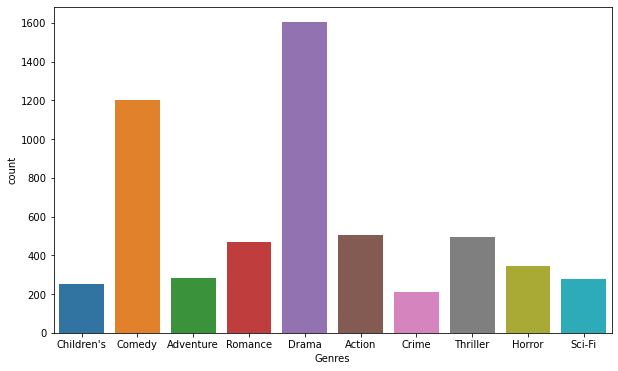

In [18]:
def top_genres(df,N=5):
    plt.figure(figsize=(10,6))
    plt.xlabel('Genres')
    sns.countplot(df[df.isin(df.value_counts().head(N).reset_index()['index'])])
    plt.show()


#Top 10 genres
top_genres(df_movies['Genres'],N= 10)

#### Feature Engineering: Getting the release year from movies

In [19]:
df_movies['Title'].apply(lambda x: x.split('(')[1][:-1]).unique()

array(['1995', 'Yao a yao yao dao waipo qiao)', 'Se7en)', '1994',
       'The Postman)', 'Le Confessionnal)', '1996', 'Gazon maudit)',
       'Badkonake Sefid )', 'Antonia)', 'Haine, La)',
       'Keiner liebt mich)', '1976', '1993', '1992',
       "Uomo delle stelle, L')", 'Saimt el Qusur)', 'Cienie)', '1967',
       'Parapluies de Cherbourg, Les)', 'Utomlyonnye solntsem)',
       'Pred dozhdot)', '1977', 'Como agua para chocolate)',
       'Mi vida loca)', 'a.k.a. Leon: The Professional)',
       'La Reine Margot)', 'Pret-A-Porter)', 'Fresa y chocolate)',
       'Huozhe)', 'Die Macht der Bilder)', '1965', 'Ai no corrida)',
       'Nuits fauves, Les)', '1982', '1962', 'Bulletproof Heart)',
       'K�disbellan )', 'Io speriamo che me la cavo )', 'Caf� au Lait)',
       'Caro Diario)', 'De eso no se habla)', '1990', '1991', '1989',
       '1937', '1940', '1969', 'Wu Kui)', '1981', 'Pane e cioccolata)',
       '1970', 'La Flor de Mi Secreto)', 'Schrei aus Stein)',
       'Tierra y libert

In [20]:
df_movies[df_movies['Title'].str.contains('Se7en')]

,Movie ID,Title,Genres
46,47,Seven (Se7en) (1995),Crime
46,47,Seven (Se7en) (1995),Thriller


In [21]:
df_movies[df_movies['Title'].str.contains('Le Confessionnal')]

,Movie ID,Title,Genres
58,59,"Confessional, The (Le Confessionnal) (1995)",Drama
58,59,"Confessional, The (Le Confessionnal) (1995)",Mystery


In [22]:
df_movies[df_movies['Title'].str.contains('La Fille sur le Pont')]

,Movie ID,Title,Genres
3752,3822,"Girl on the Bridge, The (La Fille sur le Pont)...",Drama
3752,3822,"Girl on the Bridge, The (La Fille sur le Pont)...",Romance


In [23]:
df_movies['Title'].apply(lambda x: x.split(' ')[-1].split('(')[1].split(')')[0]).unique()

array(['1995', '1994', '1996', '1976', '1993', '1992', '1988', '1967',
       '1964', '1977', '1965', '1982', '1962', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1956', '1959', '1968', '1980', '1975', '1986', '1948', '1943',
       '1963', '1950', '1946', '1987', '1997', '1974', '1958', '1949',
       '1972', '1998', '1933', '1952', '1951', '1957', '1961', '1954',
       '1934', '1944', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1930', "L'Associe",
       '1971', '1979', '1966', '1978', '1985', '1983', '1984', '1931',
       '1922', '1927', '1929', '1928', '1925', '1923', '1999', '1919',
       '2000', '1920', '1921'], dtype=object)

In [24]:
df_movies[df_movies['Title'].str.contains("L'Associe")]['Title'].str.split(' ').values[0][-1].split('(')[-1].split(')')[0]

'1982'

In [25]:
df_movies['ReleaseYear'] = df_movies['Title'].apply(lambda x: x.split(' ')[-1].split('(')[1].split(')')[0])

In [26]:
df_movies[df_movies['ReleaseYear'] == "L'Associe"]['ReleaseYear'] = 1982

In [27]:
df_movies['ReleaseYear'].unique()

array(['1995', '1994', '1996', '1976', '1993', '1992', '1988', '1967',
       '1964', '1977', '1965', '1982', '1962', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1956', '1959', '1968', '1980', '1975', '1986', '1948', '1943',
       '1963', '1950', '1946', '1987', '1997', '1974', '1958', '1949',
       '1972', '1998', '1933', '1952', '1951', '1957', '1961', '1954',
       '1934', '1944', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1930', "L'Associe",
       '1971', '1979', '1966', '1978', '1985', '1983', '1984', '1931',
       '1922', '1927', '1929', '1928', '1925', '1923', '1999', '1919',
       '2000', '1920', '1921'], dtype=object)

In [28]:
df_movies['ReleaseYear'].replace("L'Associe","1982",inplace=True)

In [29]:
df_movies['ReleaseYear'] = df_movies['ReleaseYear'].astype('int64')

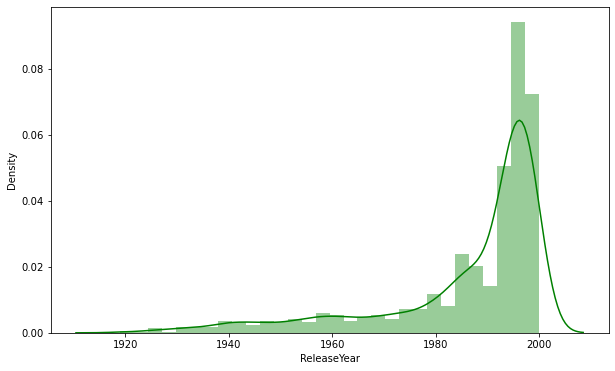

In [30]:
plt.figure(figsize=(10,6))
sns.distplot(df_movies['ReleaseYear'], kde=True, bins= 30, color='green')
plt.show()

In [31]:
df_movies.reset_index(inplace=True, drop='index')

In [32]:
df_movies.rename(columns={'Movie ID': 'MovieID'}, inplace=True)

In [33]:
df_movies

,MovieID,Title,Genres,ReleaseYear
0,1,Toy Story (1995),Animation,1995
1,1,Toy Story (1995),Children's,1995
2,1,Toy Story (1995),Comedy,1995
3,2,Jumanji (1995),Adventure,1995
4,2,Jumanji (1995),Children's,1995
...,...,...,...,...
6403,3949,Requiem for a Dream (2000),Drama,2000
6404,3950,Tigerland (2000),Drama,2000
6405,3951,Two Family House (2000),Drama,2000
6406,3952,"Contender, The (2000)",Drama,2000


### ratings eda

In [34]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [35]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [36]:
import datetime
epoch_time = 978300760
date_conv = datetime.datetime.fromtimestamp(epoch_time)
print(date_conv.strftime('%d-%m-%Y'))

01-01-2001


In [37]:
df_ratings['Timestamp'] = df_ratings['Timestamp'].apply(lambda x : datetime.datetime.fromtimestamp(x))

In [38]:
df_ratings['date'] = df_ratings['Timestamp'].apply(lambda x : x.strftime('%d-%m-%Y'))

In [39]:
df_ratings['year'] = pd.DatetimeIndex(df_ratings['date']).year
df_ratings['month'] = pd.DatetimeIndex(df_ratings['date']).month

In [40]:
df_ratings['month'].value_counts()

11    289866
8     113415
5      77259
12     73183
7      71383
6      68870
3      59294
10     53344
9      51780
4      50528
1      45668
2      45619
Name: month, dtype: int64

In [41]:
df_ratings['year'].value_counts()

2000    904175
2001     68628
2002     24053
2003      3353
Name: year, dtype: int64

In [42]:
#Which movie has the more number of ratings

df_ratings['MovieID'].value_counts().head().reset_index()['MovieID']

0    3428
1    2991
2    2990
3    2883
4    2672
Name: MovieID, dtype: int64

In [43]:
df_movies[df_movies['MovieID'].isin(df_ratings['MovieID'].value_counts().head().reset_index()['MovieID'])][['MovieID','Title']].drop_duplicates()

,MovieID,Title
4430,2672,"Thirteenth Floor, The (1999)"
4758,2883,Mumford (1999)
4931,2990,Licence to Kill (1989)
4932,2991,Live and Let Die (1973)
5571,3428,"Champ, The (1979)"


4    348971
3    261197
5    226310
2    107557
1     56174
Name: Rating, dtype: int64


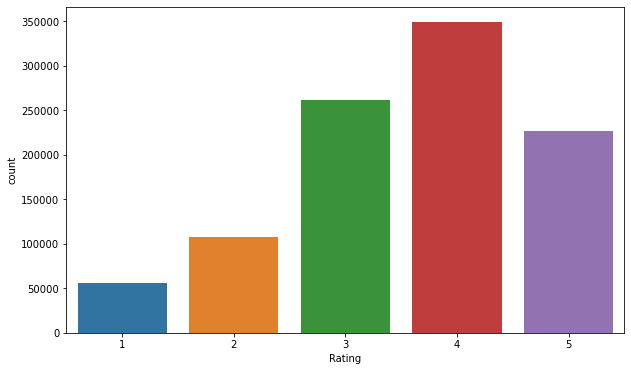

In [45]:
print(df_ratings['Rating'].value_counts())


plt.figure(figsize=(10,6))
sns.countplot(df_ratings['Rating'],label=True)
plt.show()

In [46]:
df_movies

,MovieID,Title,Genres,ReleaseYear
0,1,Toy Story (1995),Animation,1995
1,1,Toy Story (1995),Children's,1995
2,1,Toy Story (1995),Comedy,1995
3,2,Jumanji (1995),Adventure,1995
4,2,Jumanji (1995),Children's,1995
...,...,...,...,...
6403,3949,Requiem for a Dream (2000),Drama,2000
6404,3950,Tigerland (2000),Drama,2000
6405,3951,Two Family House (2000),Drama,2000
6406,3952,"Contender, The (2000)",Drama,2000


In [48]:
df_users["Age"].replace({"1": "Under 18","18": "18-24","25": "25-34",
            "35": "35-44","45": "45-49","50": "50-55","56": "56+"},inplace=True)

df_users["Occupation"] = df_users["Occupation"].astype(int).replace({0: "other",1: "academic/educator",2: "artist",
                                                3: "clerical/admin",4: "college/grad student",
                                5: "customer service",6: "doctor/health care",7: "executive/managerial",
                                8: "farmer" ,9: "homemaker",10: "K-12 student",11: "lawyer",
                                12: "programmer",13: "retired",14: "sales/marketing",15: "scientist",
                                16: "self-employed",17: "technician/engineer",
                                18: "tradesman/craftsman",19: "unemployed",20: "writer"},
                            )

In [49]:
df_users

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,K-12 student,48067
1,2,M,56,self-employed,70072
2,3,M,25,scientist,55117
3,4,M,45,executive/managerial,02460
4,5,M,25,writer,55455
...,...,...,...,...,...
6035,6036,F,25,scientist,32603
6036,6037,F,45,academic/educator,76006
6037,6038,F,56,academic/educator,14706
6038,6039,F,45,other,01060


#### Merging all the tables

In [50]:
df = df_users.merge(df_movies.merge(df_ratings,on="MovieID",how="outer"),on="UserID",how="outer")

In [51]:
df.shape

(2102031, 14)

In [52]:
df_movies.shape,df_ratings.shape,df_users.shape

((6408, 4), (1000209, 7), (6040, 5))

In [53]:
df_ = df.copy()

In [54]:
df_.dropna(inplace=True)

In [55]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2101815 entries, 0 to 2101814
Data columns (total 14 columns):
 #   Column       Dtype         
---  ------       -----         
 0   UserID       float64       
 1   Gender       object        
 2   Age          float64       
 3   Occupation   object        
 4   Zip-code     object        
 5   MovieID      int64         
 6   Title        object        
 7   Genres       object        
 8   ReleaseYear  int64         
 9   Rating       float64       
 10  Timestamp    datetime64[ns]
 11  date         object        
 12  year         float64       
 13  month        float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memory usage: 240.5+ MB


In [58]:
df_['ReleaseYear']=df_['ReleaseYear'].astype('int32')
df_['Rating']=df_['Rating'].astype('int32')

In [60]:
bins = [1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 2000]
labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']

df_["Released_In"] =  pd.cut(df_['ReleaseYear'], bins=bins, labels=labels)

#### Average user rating distribution:

<AxesSubplot:xlabel='Rating', ylabel='Count'>

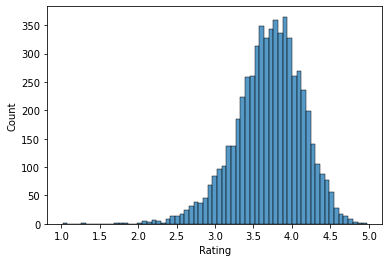

In [61]:
sns.histplot(df_[['UserID','Rating']].groupby('UserID').mean()["Rating"])
# average ratings given by each user distribution

<AxesSubplot:xlabel='Rating', ylabel='Count'>

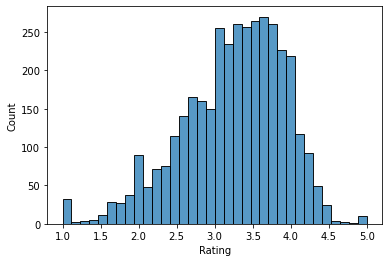

In [63]:
sns.histplot(df_[['MovieID','Rating']].groupby('MovieID').mean()["Rating"])
# average rating , that each movie has receieved by users .

In [64]:
df_["MovieID"].nunique()

3706

In [66]:
m = df_movies[["MovieID","Title","Genres"]]
m["Genres"] = m["Genres"].str.split("|")
m = m.explode("Genres")
m["Genres"] = m["Genres"].replace({"":"Other","Horro":"Horror","Sci-":"Sci-Fi","Sci":"Sci-Fi","Sci-F":"Sci-Fi","Dr":"Drama","Documenta":"Documentary",
                     "Wester":"Western","Fant":"Fantasy","Chil":"Children's","R":"Romance","D":"Drama","Rom":"Romance","Animati":"Animation","Childr":"Children's","Childre":"Children's",
                     "Fantas":"Fantasy","Come":"Comedy","Dram":"Drama","S":"Sci-Fi","Roma":"Romance","A":"Adventure","Children":"Children's","Adventu":"Adventure","Adv":"Adventure",
                      "Wa":"War","Thrille"  :"Thriller","Com":"Comedy","Comed":"Comedy","Acti":"Action","Advent":"Adventure","Adventur":"Adventure","Thri":"Thriller",
                        "Chi":"Children's","Ro":"Romance","F":"Fantasy","We":"Western","Documen":"Documentary","Music":"Musical","Children":"Children's" ,"Horr":"Horror",
                     "Children'":"Children's","Roman":"Romance","Docu":"Documentary","Th":"Thriller","Document":"Documentary"
                    })

m = m.pivot_table(values="Title", index="MovieID", columns="Genres", aggfunc= np.size,).fillna(0)


def apply(x):
  if x >= 1:
    return 1
  else:
    return 0
    
m["Adventure"] = m["Adventure"].apply(apply)
m = m.astype(int)

In [67]:
m

Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3949,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3950,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [68]:
final_data = df.merge(m,on="MovieID",how="left").drop(["Genres"],axis = 1)

In [69]:
final_data

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Title,ReleaseYear,Rating,Timestamp,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.0,F,1.0,K-12 student,48067,1,Toy Story (1995),1995,5.0,2001-01-07 05:07:48,...,0,0,0,0,0,0,0,0,0,0
1,1.0,F,1.0,K-12 student,48067,1,Toy Story (1995),1995,5.0,2001-01-07 05:07:48,...,0,0,0,0,0,0,0,0,0,0
2,1.0,F,1.0,K-12 student,48067,1,Toy Story (1995),1995,5.0,2001-01-07 05:07:48,...,0,0,0,0,0,0,0,0,0,0
3,1.0,F,1.0,K-12 student,48067,48,Pocahontas (1995),1995,5.0,2001-01-07 05:09:11,...,0,0,0,1,0,1,0,0,0,0
4,1.0,F,1.0,K-12 student,48067,48,Pocahontas (1995),1995,5.0,2001-01-07 05:09:11,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102026,NaN,NaN,NaN,NaN,NaN,3750,Boricua's Bond (2000),2000,NaN,NaT,...,0,0,0,0,0,0,0,0,0,0
2102027,NaN,NaN,NaN,NaN,NaN,3829,Mad About Mambo (2000),2000,NaN,NaT,...,0,0,0,0,0,1,0,0,0,0
2102028,NaN,NaN,NaN,NaN,NaN,3829,Mad About Mambo (2000),2000,NaN,NaT,...,0,0,0,0,0,1,0,0,0,0
2102029,NaN,NaN,NaN,NaN,NaN,3856,Autumn Heart (1999),1999,NaN,NaT,...,0,0,0,0,0,0,0,0,0,0


In [71]:
final_data.MovieID = final_data.MovieID.astype(int)
final_data.UserID = final_data.UserID.astype(float)
final_data.ReleaseYear = final_data.ReleaseYear.astype(float)

In [72]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2102031 entries, 0 to 2102030
Data columns (total 31 columns):
 #   Column       Dtype         
---  ------       -----         
 0   UserID       float64       
 1   Gender       object        
 2   Age          float64       
 3   Occupation   object        
 4   Zip-code     object        
 5   MovieID      int32         
 6   Title        object        
 7   ReleaseYear  float64       
 8   Rating       float64       
 9   Timestamp    datetime64[ns]
 10  date         object        
 11  year         float64       
 12  month        float64       
 13  Action       int32         
 14  Adventure    int32         
 15  Animation    int32         
 16  Children's   int32         
 17  Comedy       int32         
 18  Crime        int32         
 19  Documentary  int32         
 20  Drama        int32         
 21  Fantasy      int32         
 22  Film-Noir    int32         
 23  Horror       int32         
 24  Musical      int32      

In [73]:
final_data.nunique()

UserID           6040
Gender              2
Age                 7
Occupation         21
Zip-code         3439
MovieID          3883
Title            3883
ReleaseYear        81
Rating              5
Timestamp      458455
date             1037
year                4
month              12
Action              2
Adventure           2
Animation           2
Children's          2
Comedy              2
Crime               2
Documentary         2
Drama               2
Fantasy             2
Film-Noir           2
Horror              2
Musical             2
Mystery             2
Romance             2
Sci-Fi              2
Thriller            2
War                 2
Western             2
dtype: int64

In [74]:
plt.rcParams["figure.figsize"] = (20,8)

#### Most of the movies present in our dataset were released in year:

<AxesSubplot:xlabel='ReleaseYear'>

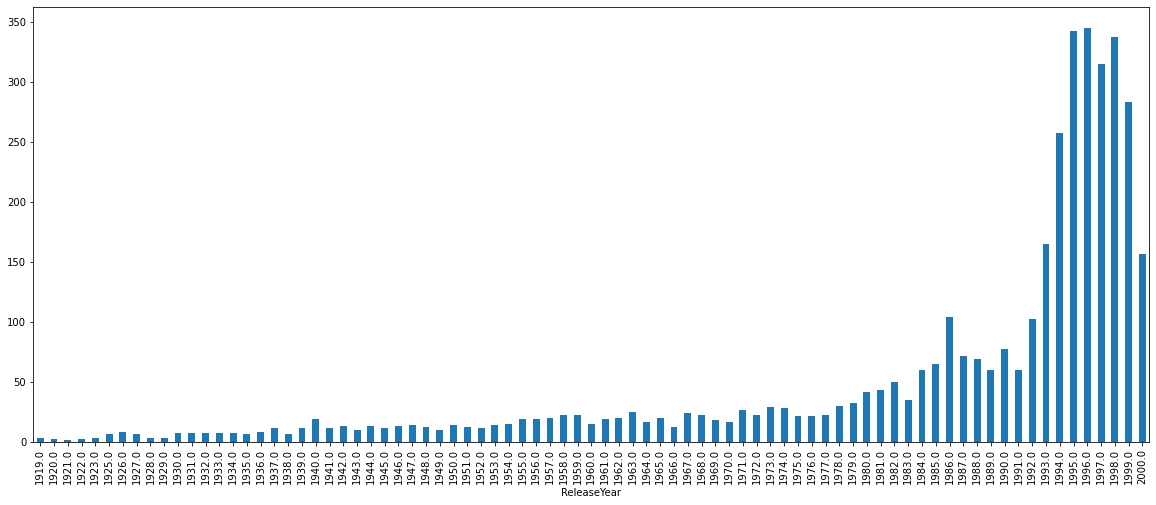

In [76]:
final_data.groupby("ReleaseYear")["Title"].nunique().plot(kind="bar")

<AxesSubplot:xlabel='Genres'>

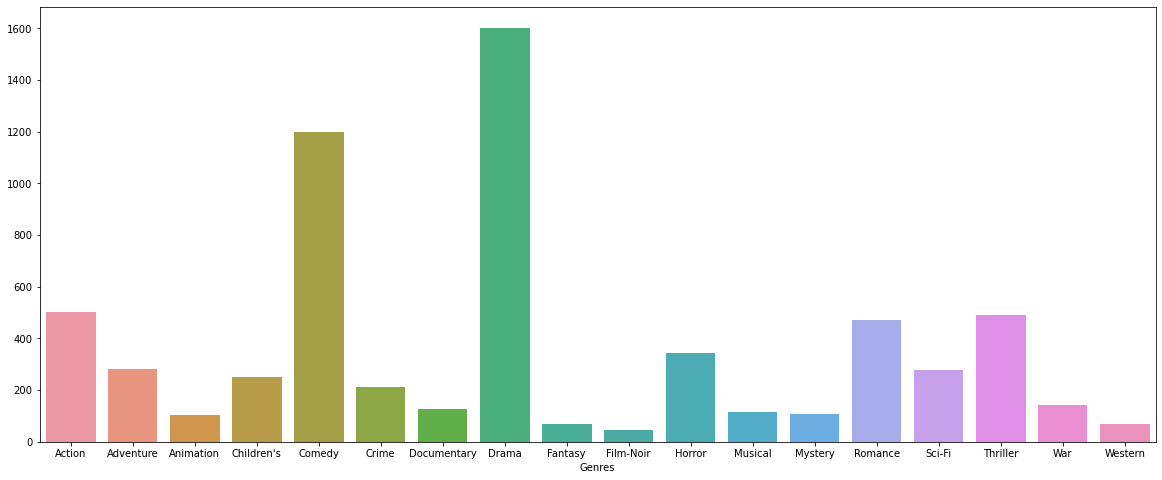

In [77]:
# Number of Movies per Genres:

sns.barplot(m.sum(axis= 0).index,
            m.sum(axis= 0))

In [78]:
m.sum(axis= 0)

Genres
Action          503
Adventure       283
Animation       105
Children's      251
Comedy         1200
Crime           211
Documentary     127
Drama          1603
Fantasy          68
Film-Noir        44
Horror          343
Musical         114
Mystery         106
Romance         471
Sci-Fi          276
Thriller        492
War             143
Western          68
dtype: int64

#### Number of movies Rated by each Gender type:

In [79]:
# Gender
asd = final_data.groupby("Gender")["Rating"].count() / final_data["Rating"].count() * 100
asd

Gender
F    24.071433
M    75.928567
Name: Rating, dtype: float64

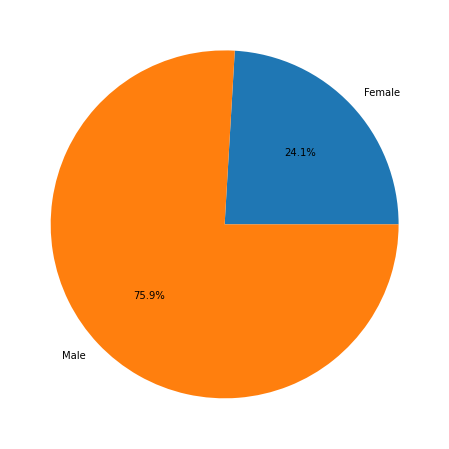

In [81]:
plt.pie(asd, labels = ["Female", "Male"],autopct='%1.1f%%')
plt.show()

#### Users of which age group have watched and rated the most number of movies?

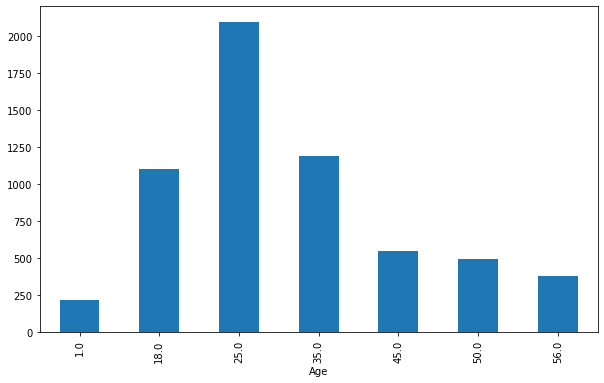

In [83]:
plt.rcParams["figure.figsize"] = (10,6)
final_data.groupby("Age")["UserID"].nunique().plot(kind="bar")
plt.show()

- in DataSet : majority of the viewers are in age group of 25-34
- out of all , 25-34 age group have rated and watched the maximum number of movies.
- for other age groups data are as below:

In [84]:
final_data.groupby("Age")["MovieID"].nunique()

Age
1.0     2650
18.0    3393
25.0    3508
35.0    3447
45.0    3288
50.0    3258
56.0    2913
Name: MovieID, dtype: int64

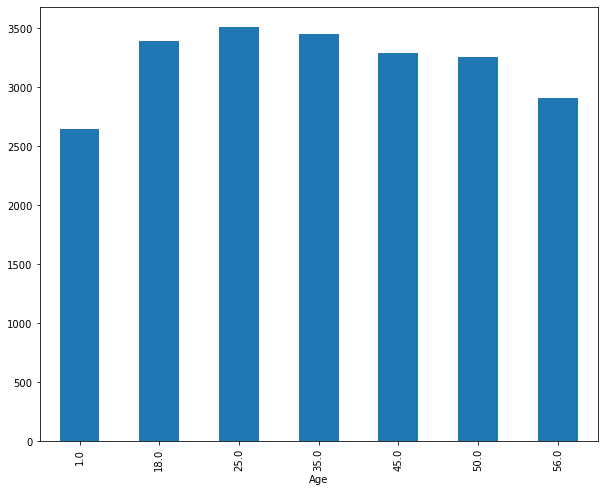

In [85]:
plt.rcParams["figure.figsize"] = (10,8)
final_data.groupby("Age")["MovieID"].nunique().plot(kind="bar")
plt.show()

#### Users belonging to which profession have watched and rated the most movies?

<AxesSubplot:xlabel='Occupation'>

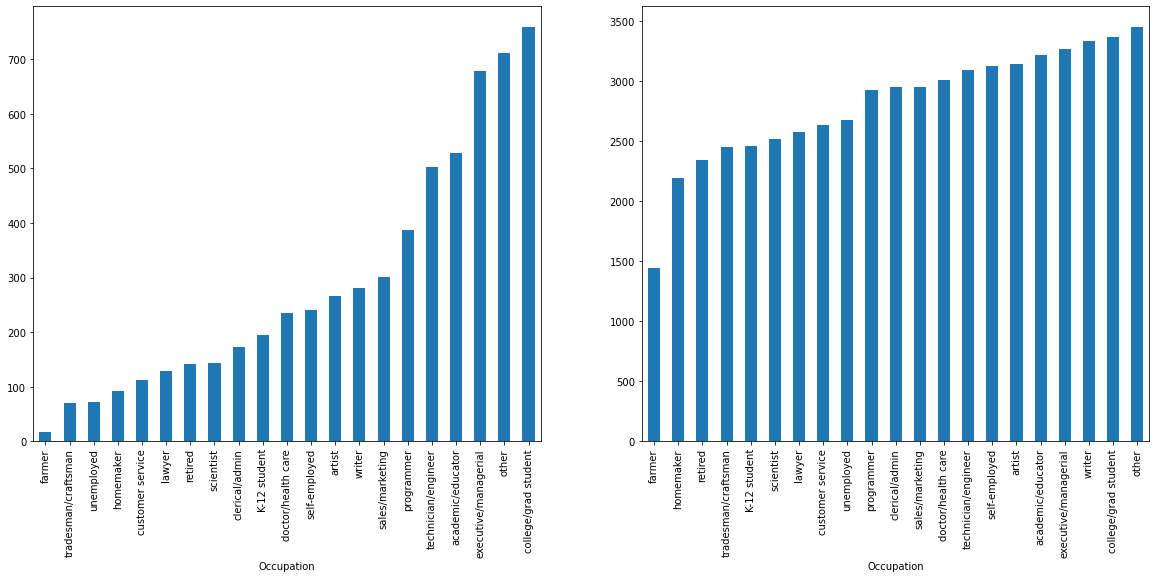

In [86]:
plt.rcParams["figure.figsize"] = (20,8)

plt.subplot(121)
final_data.groupby("Occupation")["UserID"].nunique().sort_values().plot(kind="bar")
plt.subplot(122)
final_data.groupby("Occupation")["MovieID"].nunique().sort_values().plot(kind="bar")

- Majority of the Users are College Graduates and Students , followed by Executives, educators and engineers.
- most of the Users are College Graduates and Students , followed by Executives, educators and engineers.
- Maximum movies are watched and rated by user's occupations are College graduate students , writers , executives, educator and artists.

In [87]:
final_data.groupby("Occupation")["MovieID"].nunique().sort_values(ascending = False).head(6)

Occupation
other                   3448
college/grad student    3363
writer                  3330
executive/managerial    3269
academic/educator       3218
artist                  3145
Name: MovieID, dtype: int64

In [88]:
final_data.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code', 'MovieID', 'Title',
       'ReleaseYear', 'Rating', 'Timestamp', 'date', 'year', 'month', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

### Movie Recommendation based on Genres as per Majority Users occupation :

- below table shows the rank preference of each occupation users:
- higher the number more prefered .

In [89]:
## Movie Recommendation based on Genre as per Majority Users : 

In [92]:
np.argsort((final_data.groupby("Occupation")['Action', 'Adventure', 'Animation', "Children's", 
                                             'Comedy', 'Crime','Documentary', 'Drama', 'Fantasy', 
                                             'Film-Noir', 'Horror', 'Musical', 'Mystery',
                                             'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'].mean())   *100,axis = 1).loc[["writer","artist","academic/educator","executive/managerial","college/grad student"]]


,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Occupation,,,,,,,,,,,,,,,,,,
writer,6,17,9,8,12,11,2,10,16,3,5,1,13,14,15,0,4,7
artist,6,17,9,12,8,2,11,10,16,3,5,1,13,14,15,0,4,7
academic/educator,6,17,9,8,2,12,11,10,3,16,5,1,14,13,15,0,4,7
executive/managerial,6,9,17,2,11,12,8,10,3,16,5,13,1,14,15,4,7,0
college/grad student,6,9,17,12,11,8,2,10,16,5,3,13,1,14,15,7,4,0


- Writers , artists and educator most preferes to watch Animation, Fantasy and Science Fiction movies, followed by Romance , Action and rest of the genres.
- College Students most prefer to watch Children's , Science Fiction, Romance and Fantasy movies.
- Film-Noir is more prefered by the educators and Executive occupation users.

### Top 10 Movies have got the most number of ratings :

In [93]:
top10_movies = final_data.groupby("Title")["Rating"].count().reset_index().sort_values(by="Rating",ascending=False).head(10)
top10_movies

,Title,Rating
3306,Star Wars: Episode V - The Empire Strikes Back...,14950
3307,Star Wars: Episode VI - Return of the Jedi (1983),14415
3305,Star Wars: Episode IV - A New Hope (1977),11964
2245,Men in Black (1997),10152
2785,"Princess Bride, The (1987)",9272
1942,L.A. Confidential (1997),9152
1043,E.T. the Extra-Terrestrial (1982),9076
3304,Star Wars: Episode I - The Phantom Menace (1999),9000
98,Alien (1979),8096
1868,Jurassic Park (1993),8016


<AxesSubplot:xlabel='Rating', ylabel='Title'>

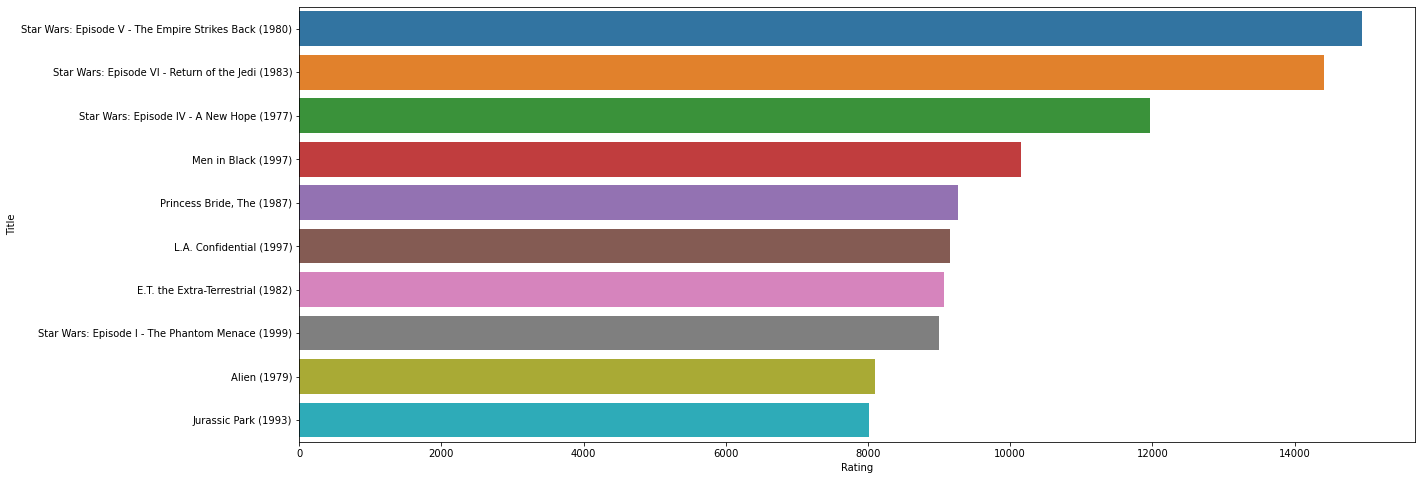

In [94]:
sns.barplot(y = top10_movies["Title"],
            x = top10_movies["Rating"])

### 5 Top rated Recommended Movies per each genre:

In [97]:
Genres = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime','Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery','Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

for G in Genres:
  print(G)
  print("----------------------")
  print(final_data[final_data[G] == 1].groupby("Title")["Rating"].count().sort_values(ascending=False).head(5))
  print()
  print()
  print()

Action
----------------------
Title
Star Wars: Episode V - The Empire Strikes Back (1980)    14950
Star Wars: Episode VI - Return of the Jedi (1983)        14415
Star Wars: Episode IV - A New Hope (1977)                11964
Men in Black (1997)                                      10152
Princess Bride, The (1987)                                9272
Name: Rating, dtype: int64



Adventure
----------------------
Title
Star Wars: Episode V - The Empire Strikes Back (1980)    14950
Star Wars: Episode VI - Return of the Jedi (1983)        14415
Star Wars: Episode IV - A New Hope (1977)                11964
Men in Black (1997)                                      10152
Princess Bride, The (1987)                                9272
Name: Rating, dtype: int64



Animation
----------------------
Title
Toy Story (1995)                   6231
Aladdin (1992)                     5404
Who Framed Roger Rabbit? (1988)    5397
Little Mermaid, The (1989)         5175
Bug's Life, A (1998)               5